## Water Potability 

### IS your water safe to drink? 

#### Are you gonna be a 1 ;p or a 0 xp ?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [3]:
# not necessary once downloaded
# path = !wget http://www.keshavmaheshwari.us/images/water_potability.csv

In [4]:
water_data = pd.read_csv('water_potability.csv')

print(water_data.shape)
water_data.head(10)

(3276, 10)


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

<AxesSubplot:>

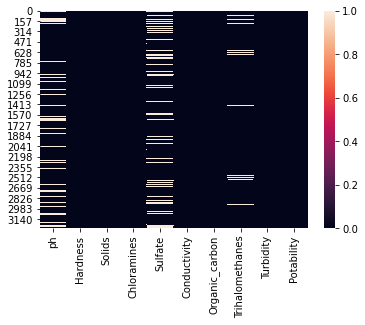

In [5]:
sns.heatmap(water_data.isnull())

In [6]:
def split_data(df):
    training_set, testing_set = train_test_split(df)
    # tns = training_set.reindex(range(training_set.shape[0]))
    # tts = testing_set.reindex(range(testing_set.shape[0]))
    tns = training_set.reset_index(drop=True)
    tts = testing_set.reset_index(drop=True)
    return tns, tts
    # return train_test_split(df)

In [7]:
train1, test1 = split_data(water_data)

print(train1.shape)
print(test1.shape)

(2457, 10)
(819, 10)


training set 1 heatmap: 


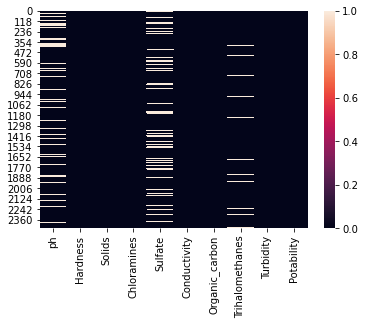

In [8]:
print("training set 1 heatmap: ")
p1 = sns.heatmap(train1.isnull())

testing set 1 heatmap: 


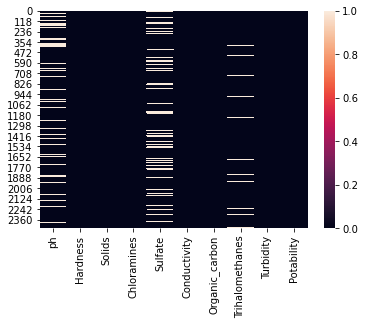

In [9]:
print("testing set 1 heatmap: ")
p2 = sns.heatmap(train1.isnull())

In [10]:
train2, test2 = split_data(water_data)
print(train2.shape)
print(test2.shape)

test2.head()

(2457, 10)
(819, 10)


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  9.514627  215.725527  16553.562437     7.547859  321.776213    453.918490   
1  8.860451  193.743105  24085.112140     6.183110         NaN    526.704924   
2  5.422446  205.266080  18542.957451     5.491963  306.702227    382.080129   
3  8.077261  125.302719  23931.282833     8.773162  317.693331    398.328789   
4       NaN  169.188736  18408.294971     5.131839  342.937675    350.894362   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        9.640241        57.865423   2.645036           1  
1        9.901328        81.339340   4.677713           1  
2       10.504023        67.493450   2.911751           1  
3       15.279583        62.668356   4.279871           1  
4       19.334232        86.677328   6.739000           0

In [11]:
def impute_missing_data(training_set, testing_set):
    train_s = impute_features(training_set)
    test_s = impute_features(testing_set)
    #print(train_s.head())
    #print(test_s.head())
    return (train_s, test_s)


def impute_features(input_dataset):
    dataset = input_dataset.copy()
    count = 0
    for i in dataset:
        no_na_column = dataset[i].dropna().values
        mean = sum(no_na_column) / len(no_na_column)
        # counter = Counter(no_na_column)
        # mode = counter.most_common(1)[0][0]
        na_map_list = list(dataset[i].isna().values)
        for b in range(len(na_map_list)):
            if na_map_list[b] == True:
                count +=1
                dataset.__getitem__(i).__setitem__(b, mean) ### Very possible to improve KNN 
                ## by finding a better method for imputing the missing data
                #dataset.iloc[i][b] = mode
    return dataset.copy()


# def normalize_features(train, test):
#     trn = train.copy()
#     tst = test.copy()
#     return (z_scaling(trn), z_scaling(tst))


# def z_scaling(dataset):
#     just_numerical = dataset.select_dtypes(include='number')
#     just_numerical.head()
#     for column in just_numerical.columns:
#         dataset[column] = (dataset[column] - dataset[column].mean()) / dataset[column].std()
#     return dataset


def distance(row1, row2):
    d = 0
    #count = 1
    for a, b in zip(row1, row2):
        #print(str(count))
        c = abs(a - b)
        d += (c ** (1/2))
#         try:
#             c = abs((a**2) - (b**2))
#             d += c
#             #print("good: " + str(a) + " - " + str(b) + " = " + str(c))
#             #print((c*c))
#         except:
#             #print("unsubtractable, " + str(a) + " " + str(b))
#             #print("unaccepatble")
#             if str(a) != str(b):
#                 d += 1
#                 #print("different -> 1")
#         else:
#             #print("same -> 0")
#             #print("what?")
#             continue
#         #finally:
#             #print("tried and did\n")
#             #count += 1
            #continue
    return np.sqrt(d)


def predict(training_set, testing_set, k_nearest):
    predictions = []
    for i in tqdm(range(int(testing_set.shape[0]))):
        recorded_vals = []
        rowTest = testing_set.loc[i].values
        for j in range(int(training_set.shape[0])):
            rowTrain = training_set.iloc[j].values
            dist = distance(rowTrain, rowTest)
            val = rowTrain[-1]
            #print(val)
            recorded_vals += [(dist, val)]
        topk_outcomes = [label for (dist, label) in sorted(recorded_vals)[:k_nearest]]
        labels = set(topk_outcomes)
        outcomes = []
        for label in labels:
            count = topk_outcomes.count(label)
            outcomes += [(count, label)]
        (_, outcome) = max(outcomes)
        predictions += [outcome]
    return predictions

def compare(training_set, testing_set, k):
    predicted = predict(training_set, testing_set, k)
    actual = list(testing_set.iloc[:, -1].values)
    comparison = pd.DataFrame(list(zip(predicted, actual)))
    #print(comparison.head(10))
    return (predicted, actual)

def accuracy(predicted, actual):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            correct += 1
    return correct / len(predicted)

def run_test(trnS, tstS, k, treatment=False):
    if treatment:
        (trnS, tstS) = impute_missing_data(trnS, tstS)
        #(trnS, tstS) = normalize_features(trnS, tstS)
        #trnS.head()
    #print("filled in the blanks")
    (pred, act) = compare(trnS, tstS, k)
    acc = accuracy(pred, act)
    print("trial " + str(k))
    # print("For k = " + str(k) + ",")
    # print("accuracy = " + str(acc))
    return acc

In [11]:
# (t2, tst2) = impute_missing_data(train2, test2)

# t2.head(50)

In [12]:
# def run_tests(trnS, tstS, k_range, treatment=False):
#     for i in tqdm(range(1, k_range + 1, 2)):
#         run_test(trnS, tstS, i, treatment)
        
# run_tests(train2, test2, 20, True)

In [12]:
import matplotlib.pyplot as plt
import multiprocessing
from joblib import Parallel, delayed

k_range = list(range(1,100,2))
num_cores = multiprocessing.cpu_count()
print(num_cores)
inputs = tqdm(k_range)

def fun(k):
  acc = run_test(train2, test2, k, True)
  return acc

executor = Parallel(n_jobs=num_cores, backend= 'multiprocessing')
tasks = (delayed(fun)(i) for i in inputs)
acc_list = executor(tasks)

plt.plot(k_range, acc_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

4


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
def printResults(acc_list, k_list):
    for k in range(len(acc_list)):
        print("For k = " + str(k_list[k]) + ",")
        print("accuracy = " + str(acc_list[k]))
    print("MAX acc: " + str(max(acc_list)))
    
printResults(acc_list, k_range)

For k = 1,
accuracy = 0.6056166056166056
For k = 3,
accuracy = 0.63003663003663
For k = 5,
accuracy = 0.6483516483516484
For k = 7,
accuracy = 0.6593406593406593
For k = 9,
accuracy = 0.663003663003663
For k = 11,
accuracy = 0.6715506715506715
For k = 13,
accuracy = 0.6752136752136753
For k = 15,
accuracy = 0.6666666666666666
For k = 17,
accuracy = 0.6666666666666666
For k = 19,
accuracy = 0.6581196581196581
For k = 21,
accuracy = 0.6556776556776557
For k = 23,
accuracy = 0.6568986568986569
For k = 25,
accuracy = 0.6691086691086691
For k = 27,
accuracy = 0.6691086691086691
For k = 29,
accuracy = 0.6654456654456654
For k = 31,
accuracy = 0.6581196581196581
For k = 33,
accuracy = 0.6422466422466423
For k = 35,
accuracy = 0.6507936507936508
For k = 37,
accuracy = 0.6483516483516484
For k = 39,
accuracy = 0.645909645909646
For k = 41,
accuracy = 0.645909645909646
For k = 43,
accuracy = 0.652014652014652
For k = 45,
accuracy = 0.6446886446886447
For k = 47,
accuracy = 0.6507936507936508
For

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = impute_features(water_data)

inputs = X.drop('Potability', axis=1)
outputs = X['Potability']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))

<ipython-input-10-6597d4de77bd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.__getitem__(i).__setitem__(b, mean) ### Very possible to improve KNN


              precision    recall  f1-score   support

           0       0.64      1.00      0.78       524
           1       0.00      0.00      0.00       295

    accuracy                           0.64       819
   macro avg       0.32      0.50      0.39       819
weighted avg       0.41      0.64      0.50       819



/share/pkg.7/python3/3.8.6/install/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# run_test(train1, test1, 1, True)
# run_test(train1, test1, 3, True)
# run_test(train1, test1, 5, True)
# run_test(train1, test1, 7, True)
# run_test(train1, test1, 9, True)
# run_test(train1, test1, 11, True)
# run_test(train2, test2, 13, True)
# run_test(train1, test1, 31, True)
# run_test(train1, test1, 33, True)